In [1]:
import os
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

os.chdir(r'C:\Users\user\Desktop\연구\1. Chem_GCN\2. 성능')

In [2]:
dataset = 'lipo'
# vd point size: 25
# else: 15

if dataset == 'freesolv':
    MSE_k = 0
    MAE_k = 0
elif dataset == 'esol':
    MSE_k = 2
    MAE_k = 2
elif dataset == 'vd':
    MSE_k = 2
    MAE_k = 2
elif dataset == 'lipo':
    MSE_k = 2
    MAE_k = 2

print(MSE_k, MAE_k)

2 2


# MSE & MSE for train dataset

In [3]:
# MSE
df_val_MSE = pd.read_csv('result_val_' + dataset + f'_mse_{MSE_k}'  + '.csv')
print(df_val_MSE.shape[1])

# MAE
df_val_MAE = pd.read_csv('result_val_' + dataset + f'_mae_{MAE_k}' + '.csv')
print(df_val_MAE.shape[1])

27
27


In [4]:
# MSE 컬럼명 추가
columns = ['target', 'fitted'] + [f'feature{i}' for i in range(1, df_val_MSE.shape[1]-1)]
df_val_MSE.columns = columns

# MAE 컬럼명 추가
columns = ['target', 'fitted'] + [f'feature{i}' for i in range(1, df_val_MAE.shape[1]-1)]
df_val_MAE.columns = columns

In [5]:
# R^2
r2_mse = r2_score(df_val_MSE['fitted'], df_val_MSE['target'])
r2_mae = r2_score(df_val_MAE['fitted'], df_val_MAE['target'])

print(r2_mse)
print(r2_mae)

0.5662019413410362
0.5400528059413613


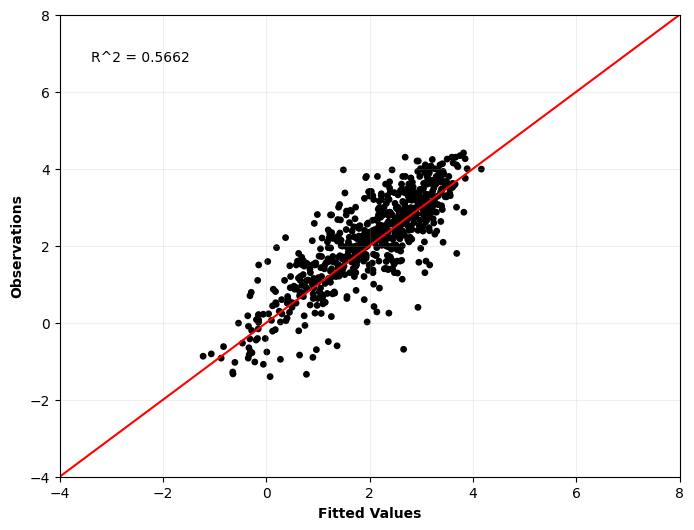

In [6]:
from matplotlib.colors import ListedColormap
pastel_cmap = ListedColormap(["black"])

plt.figure(figsize = (8, 6))

scatter = plt.scatter(df_val_MSE['fitted'], df_val_MSE['target'],
                      c=df_val_MSE['target'], s=15,
                      cmap = pastel_cmap)

# 대각선 추가
min_val = min(df_val_MSE['target'].min(), df_val_MSE['fitted'].min()) - 20
max_val = max(df_val_MSE['target'].max(), df_val_MSE['fitted'].max()) + 20
plt.plot([min_val, max_val], [min_val, max_val], color='red')

if dataset == 'freesolv':
    plt.xlim(-15, 6)
    plt.ylim(-15, 6)
    plt.xticks(range(-15, 9, 3))
    plt.yticks(range(-15, 9, 3))
elif dataset == 'esol':
    plt.xlim(-10, 4)
    plt.ylim(-10, 4)
    plt.xticks(range(-10, 6, 2))
    plt.yticks(range(-10, 6, 2))
elif dataset == 'vd':
    plt.xlim(0, 8)
    plt.ylim(0, 8)
    plt.xticks(range(0, 9, 1))
    plt.yticks(range(0, 9, 1))
elif dataset == 'lipo':
    plt.xlim(-4, 8)
    plt.ylim(-4, 8)
    plt.xticks(range(-4, 10, 2))
    plt.yticks(range(-4, 10, 2))
    
plt.xlabel("Fitted Values", fontweight = 'bold')
plt.ylabel("Observations", fontweight = 'bold')

plt.text(0.05, 0.90, f'R^2 = {r2_mse:.4f}',
         transform = plt.gca().transAxes,
         fontsize = 10,)

plt.grid(alpha = 0.2)

# 저장
os.chdir(r'C:\Users\user\Desktop\연구\1. Chem_GCN\2. 성능\scatter_plot')
plt.savefig(f'scatter_fitted_mse_{dataset}.png', dpi = 300, bbox_inches = 'tight')

plt.show()

# MAE

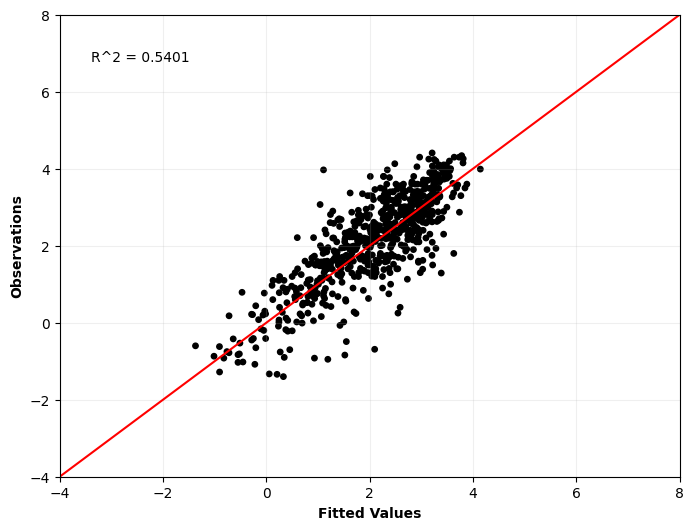

In [7]:
from matplotlib.colors import ListedColormap
pastel_cmap = ListedColormap(["black"])

plt.figure(figsize = (8, 6))

scatter = plt.scatter(df_val_MAE['fitted'], df_val_MAE['target'],
                      c=df_val_MAE['target'], s=15,
                      cmap = pastel_cmap)

# 대각선 추가
min_val = min(df_val_MAE['target'].min(), df_val_MAE['fitted'].min()) - 20
max_val = max(df_val_MAE['target'].max(), df_val_MAE['fitted'].max()) + 20
plt.plot([min_val, max_val], [min_val, max_val], color='red')

if dataset == 'freesolv':
    plt.xlim(-15, 6)
    plt.ylim(-15, 6)
    plt.xticks(range(-15, 9, 3))
    plt.yticks(range(-15, 9, 3))
elif dataset == 'esol':
    plt.xlim(-10, 4)
    plt.ylim(-10, 4)
    plt.xticks(range(-10, 6, 2))
    plt.yticks(range(-10, 6, 2))
elif dataset == 'vd':
    plt.xlim(0, 8)
    plt.ylim(0, 8)
    plt.xticks(range(0, 9, 1))
    plt.yticks(range(0, 9, 1))
elif dataset == 'lipo':
    plt.xlim(-4, 8)
    plt.ylim(-4, 8)
    plt.xticks(range(-4, 10, 2))
    plt.yticks(range(-4, 10, 2))
    
plt.xlabel("Fitted Values", fontweight = 'bold')
plt.ylabel("Observations", fontweight = 'bold')

plt.text(0.05, 0.90, f'R^2 = {r2_mae:.4f}',
         transform = plt.gca().transAxes,
         fontsize = 10,)

plt.grid(alpha = 0.2)

# 저장
os.chdir(r'C:\Users\user\Desktop\연구\1. Chem_GCN\2. 성능\scatter_plot')
plt.savefig(f'scatter_fitted_mae_{dataset}.png', dpi = 300, bbox_inches = 'tight')

plt.show()